### 1. IMPORT THE LIBRABRIES

In [98]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Import the dataset

In [99]:
fruits = pd.read_csv('fruits_Data.csv')

In [113]:
fruits.head()

,Unnamed: 0,label,fruits,subtype,mass,width,height,color_score
0,0,1,banana,red_banana,195,10.4,9.3,0.47
1,1,1,banana,red_banana,183,10.0,8.8,0.51
2,2,1,banana,red_banana,179,9.4,9.2,0.52
3,3,2,watermelon,watermelon,89,8.2,6.7,0.72
4,4,2,watermelon,watermelon,87,8.0,6.6,0.71


In [101]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
fruit_name = dict(zip(fruits.label.unique(), fruits.fruits.unique()))   
fruit_name

{1: 'banana', 2: 'watermelon', 3: 'orange', 4: 'lemon'}

In [102]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
Unnamed: 0     69 non-null int64
label          69 non-null int64
fruits         69 non-null object
subtype        69 non-null object
mass           69 non-null int64
width          69 non-null float64
height         69 non-null float64
color_score    69 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.4+ KB


In [103]:
fruits.describe()

,Unnamed: 0,label,mass,width,height,color_score
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,34.000000,2.753623,165.347826,8.888406,9.744928,0.691304
std,20.062403,1.229608,52.815669,0.957561,1.318816,0.073982
min,0.000000,1.000000,79.000000,6.800000,6.000000,0.470000
25%,17.000000,1.000000,134.000000,8.200000,9.200000,0.640000
50%,34.000000,3.000000,161.000000,9.100000,9.600000,0.690000
75%,51.000000,4.000000,183.000000,9.400000,10.400000,0.740000
max,68.000000,4.000000,365.000000,11.600000,12.500000,0.850000


### Split the Dataset into Dependent and Independent Varibale

In [107]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['label']

### Split the data into train and test

In [198]:
def train_test(X,y, ratio):
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=ratio, random_state=0)
    return X_train, X_test, y_train, y_test

In [199]:
X_train, X_test, y_train, y_test = train_test(X,y , 0.9)

#### Investigate the total data points in both train and test

In [200]:
def shape_of_data(X_train, X_test, y_train, y_test):
    X_train = print('Shape of X_train: {}'.format(X_train.shape))
    X_test= print('Shape of X_test: {}'.format(X_test.shape))
    y_train = print('Shape of y_train: {}'.format(y_train.shape))
    y_test= print('Shape of y_test: {}'.format(y_test.shape))
    
    return X_train, X_test, y_train, y_test

In [201]:
shape_of_data(X_train, X_test, y_train, y_test)

Shape of X_train: (62, 4)
Shape of X_test: (7, 4)
Shape of y_train: (62,)
Shape of y_test: (7,)


(None, None, None, None)

# Section 2: Model Training

### 1. Choose a class of model
Any model in Scikit-learn is defined by a class in python. In this implementation, the KNN Classifier is the chosen model. It is imported from KNeighborsClassifier 

In [202]:
from sklearn.neighbors import KNeighborsClassifier 

### 2. Instantiate and choose model hyperparameters
These are some of the crucial decisions that must be taken after the model class has been chosen. Such options are most often described as hyperparameters, which are parameters that must be defined first before model can be fitted to data. Hyperparameters in Scikit-Learn are selected by passing values to the model instantiation function. In Hyperparameters and Model Validation, we'll look at how to quantified justify the selection of hyperparameters.
To suit the number of neighbors in our KNN example, we can use the n neighbors hyperparameter to instantiate the KNeighborsClassifier class:

In [203]:
knn = KNeighborsClassifier(n_neighbors=3)

Please be aware that the only operation to store these hyperparameter values while the model is setup. We haven't yet applied the model to data in general and especially: Scikit-Learn librabry shows the differentiation very clear between model selection and model implementation to data.

### 3. Fit the model to your data
After the insantiation of the model, the next step is to apply the model to our dataset. This procedure is  done using the fit() method of the selected model:

In [204]:
knn.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

This fit() command performs a series of model-dependent inner mathematical calculations, the effects of which are saved in design parameters that the user can investigate. 

### 4. Predict labels for unknown data
The key challenge of supervised machine learning after the model has been learned is to test it based on what it tells about new data that was not part of the training collection. The predict() method in Scikit-Learn can be used to accomplish this.

In [205]:
y_pred= knn.predict(X_test) 

In [206]:
sample = np.array([[195, 10.4,9.3, 0.4]])
def sample_prediction(sample):
    print("Sample.shape: {}".format(sample.shape))
    prediction = knn.predict(sample)
    print("Prediction: {}".format(prediction))
    print("Predicted fruit name: {}".format(fruit_name[prediction[0]]))
    
    
sample_prediction(sample)    

Sample.shape: (1, 4)
Prediction: [1]
Predicted fruit name: banana


### 5. Model Evaluation

The performance of the model has to be evaluated in order to know how well it performs in a new dataset. There are many evaluation metrices. These are discussed in detail in the Model Evalution chapter. The model above is evaluated using these evaluation metrices

In [207]:
from sklearn.metrics import confusion_matrix

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.71


### Summary of steps

In [208]:
from sklearn.neighbors import KNeighborsClassifier # 1. select model class
knn = KNeighborsClassifier(n_neighbors=1)          # 2.  modelinstantiation and hyperparameter tuning
knn.fit(X_train, y_train)                          # 3. fit model to data
y_pred = knn.predict(X_test)                      # 4. predict on new data

### sensitive k parameter in classification accuracy

<IPython.core.display.Javascript object>


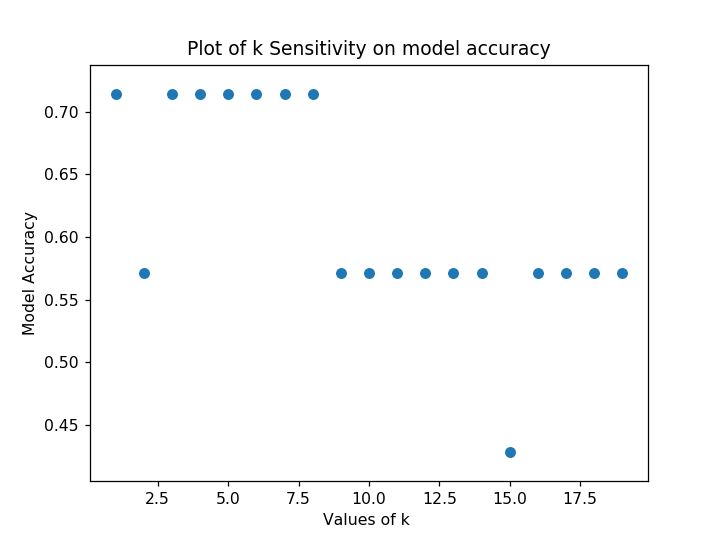

In [209]:
def k_parameter_sentivity(value):
    scores = []
    values = range(1, value)
    for k in range(1,value):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))

    plt.figure()
    plt.title('Plot of k Sensitivity on model accuracy')
    plt.xlabel('Values of k ')
    plt.ylabel('Model Accuracy')
    plt.scatter(values, scores)
k_parameter_sentivity(20)

### Observation
The value of the accuracy decreases as the value of k in is increasing. The k values and the model accuracy are inversly proportional as shown in the graph above

### Sensitive of k in classification accuracy to the train/test

<IPython.core.display.Javascript object>


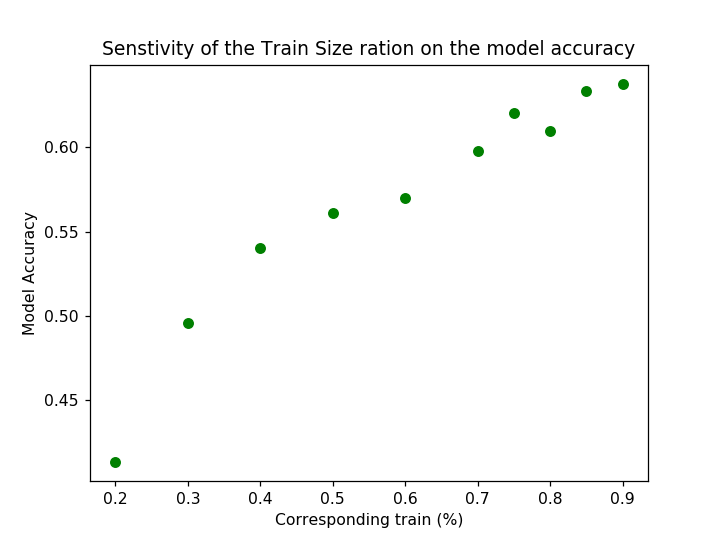

In [210]:
def k_train_test_sentivity(values):
    plt.figure()
    knn = KNeighborsClassifier(n_neighbors = 5)
    for v in values:
        scores = []
        for i in range(1,100):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-v)
            knn.fit(X_train, y_train)
            scores.append(knn.score(X_test, y_test))
        plt.plot(v, np.mean(scores), 'go--')
        
    plt.title('Senstivity of the Train Size ration on the model accuracy')
    plt.xlabel('Corresponding train (%)')
    plt.ylabel('Model Accuracy');
    

k_train_test_sentivity([0.9, 0.85, 0.8,0.75, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2])

### Observation

The accuracy of the model increases as the value of the train size increases. They are directly proportional to each other